In [1]:
# This script is used to run the detection script in the VBT module.
import sys
import os
current_dir = os.path.dirname(os.path.abspath('__file__'))
print(f'Current Directory: {current_dir}')
root_dir = os.path.abspath(os.path.join(current_dir, '..'))

if os.path.exists(root_dir):
    print(f'Root Directory exists: {root_dir}')
else:
    print(f'Root Directory does NOT exist: {root_dir}')

if root_dir not in sys.path:
    sys.path.append(root_dir)
    print(f'Added {root_dir} to sys.path')


try:
    from BounceInsight import BounceInsight
    print("Successfully imported BounceInsight")
except ModuleNotFoundError:
    print("VBT module not found. Please check the module path.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    
try:
    %reload_ext autoreload
except:
    %load_ext autoreload

%autoreload 2
    
csv_path = os.path.abspath(os.path.join(current_dir, 'files/loader'))
insight = BounceInsight(csv_path, "bounce")

Current Directory: C:\Users\timos\Desktop\BounceInsight
Root Directory exists: C:\Users\timos\Desktop
Added C:\Users\timos\Desktop to sys.path
Successfully imported BounceInsight


In [15]:
insight.analyse_bounce(id=None, plot=False)

Processing 10_slownb2.csv:  26%|██▌       | 204/787 [00:07<00:21, 27.40it/s]    

No turning point detected for file 10_fastnb3.csv. Skipping...


Finished 38_slowb2.csv:  93%|█████████▎| 732/787 [00:27<00:01, 27.50it/s]       

No turning point detected for file 38_fastnb1.csv. Skipping...


Finished 40_slownb3.csv: 100%|██████████| 787/787 [00:29<00:00, 26.93it/s]      

Number of bounce files in bounce_dict_70: 111
Number of bounce files in no_bounce_dict_70: 108
Number of bounce files in bounce_dict_80: 108
Number of bounce files in no_bounce_dict_80: 108
Number of bounce files in bounce_dict_slow: 89
Number of bounce files in no_bounce_dict_slow: 87
Number of bounce files in bounce_dict_fast: 88
Number of bounce files in no_bounce_dict_fast: 88


Results saved to validation/validation_results.csv
Visualized validation results saved to validation/validation_results.xlsx
Validation complete
Total points: 2346
Points within limits: 2284 (97.36%)
Points outside limits: 62 (2.64%)
The data is good (more than 95% points within limits of agreement).


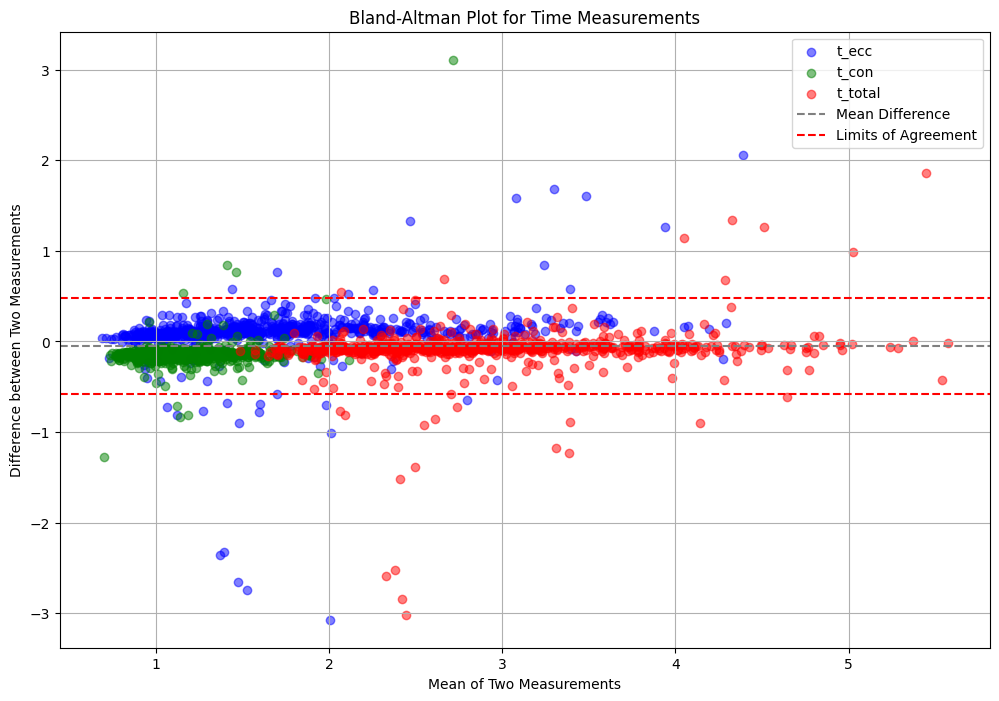

Total points: 1564
Points within limits: 1479 (94.57%)
Points outside limits: 85 (5.43%)
The data is not good (less than 95% points within limits of agreement).


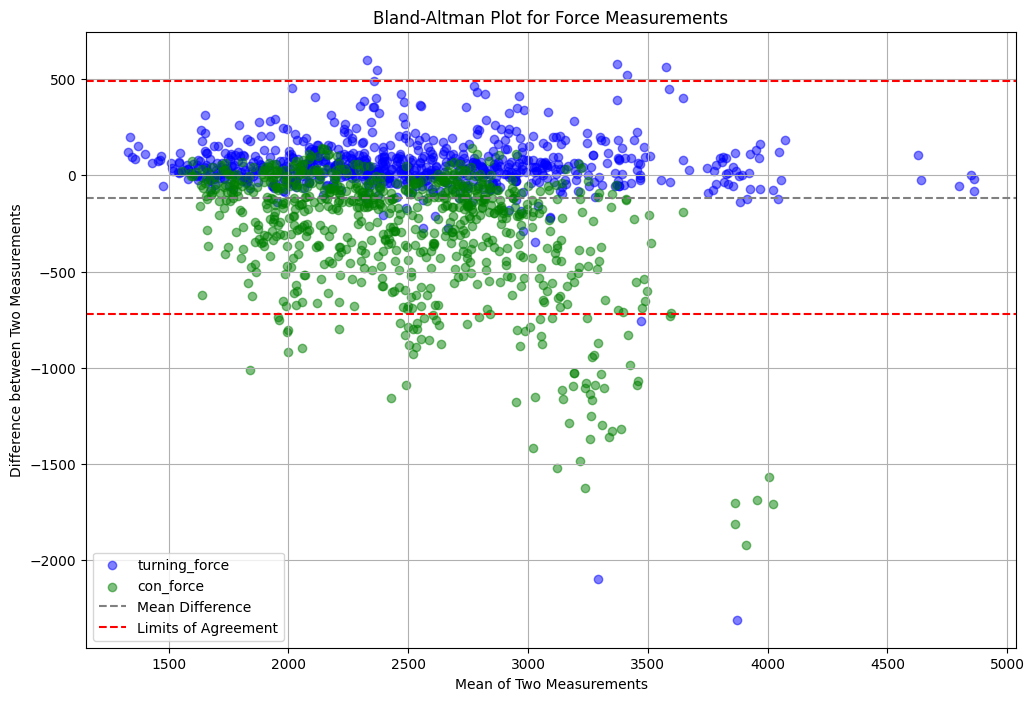

Correlation for t_ecc: 0.91, p-value < 0.001
Correlation for t_con: 0.84, p-value < 0.001
Correlation for t_total: 0.94, p-value < 0.001
Correlation for turning_force: 0.97, p-value < 0.001
Correlation for con_force: 0.83, p-value < 0.001


In [2]:
insight.validate(tolerance=0.2)

In [12]:
insight.run_statistics(analysis_type='summary')

File name not recognised: false
File name not recognised: false
Statistics for None:
t_ecc; Avg: 1.708, Std Dev: 0.716, Median: 1.546, Min: 0.149, Max: 5.422
t_con; Avg: 1.101, Std Dev: 0.282, Median: 1.043, Min: 0.069, Max: 4.268
t_total; Avg: 2.809, Std Dev: 0.785, Median: 2.663, Min: 0.937, Max: 6.377
turning_force; Avg: 2544.861, Std Dev: 614.233, Median: 2485.807, Min: 1393.323, Max: 4851.622
con_force; Avg: 2333.685, Std Dev: 437.282, Median: 2297.170, Min: 1329.104, Max: 3553.341


Dip detected: False


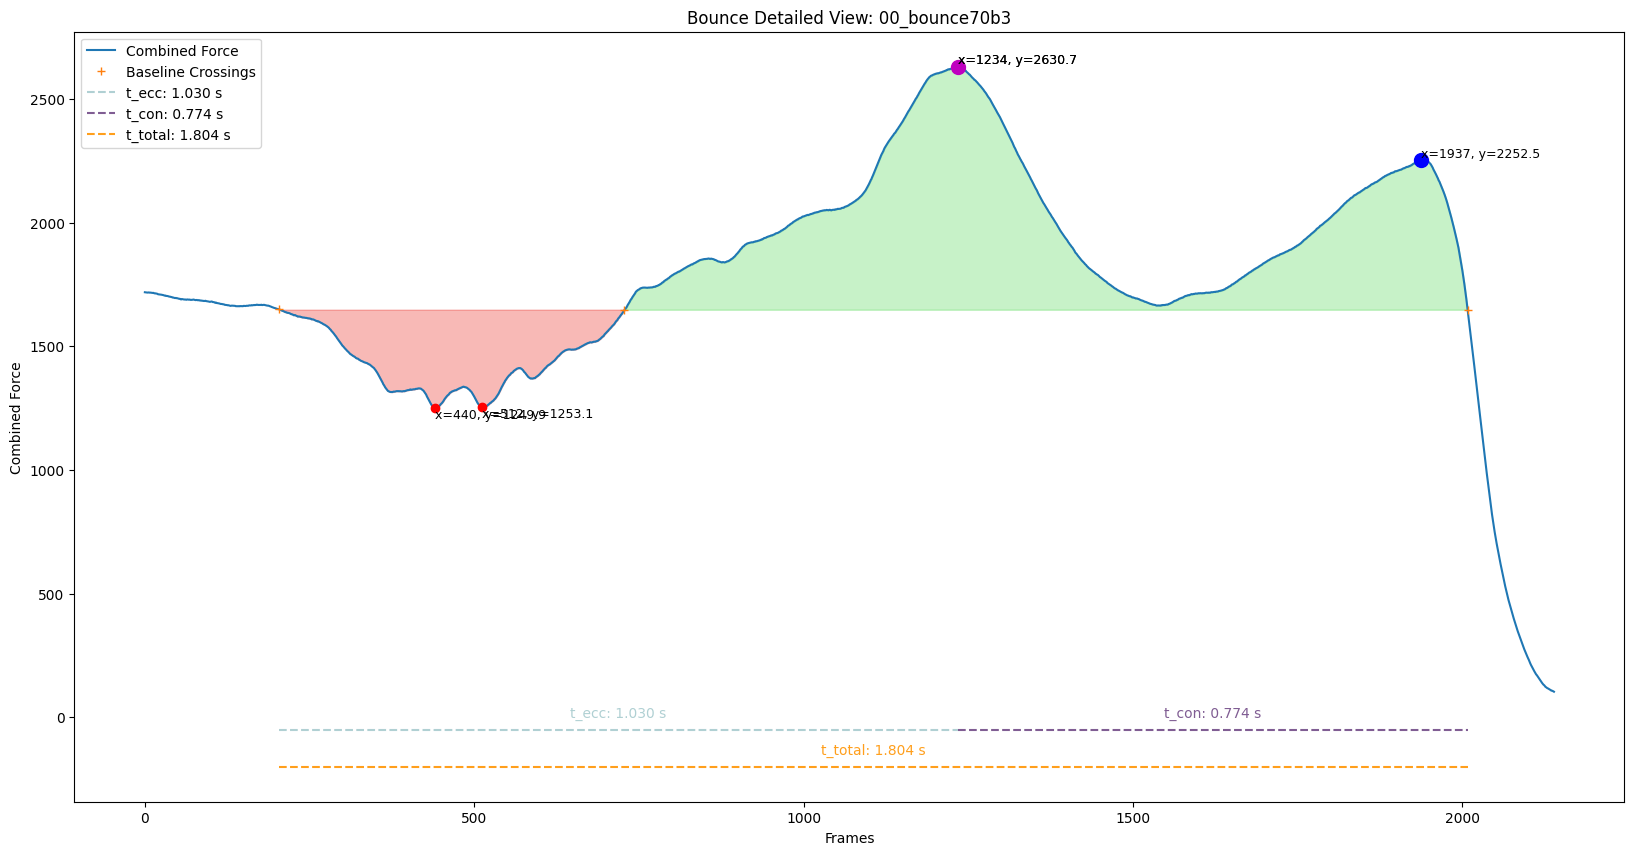

{'fps': 1000, 'source': 'fp', 'device': 'fp3d', 'gender': 'm', 'load': 90.0, 'bodyweight': 78.0}


In [6]:
insight.plot_data(file_name='00_bounce70b3')

No turning point detected for file 10_fastnb3. Skipping...


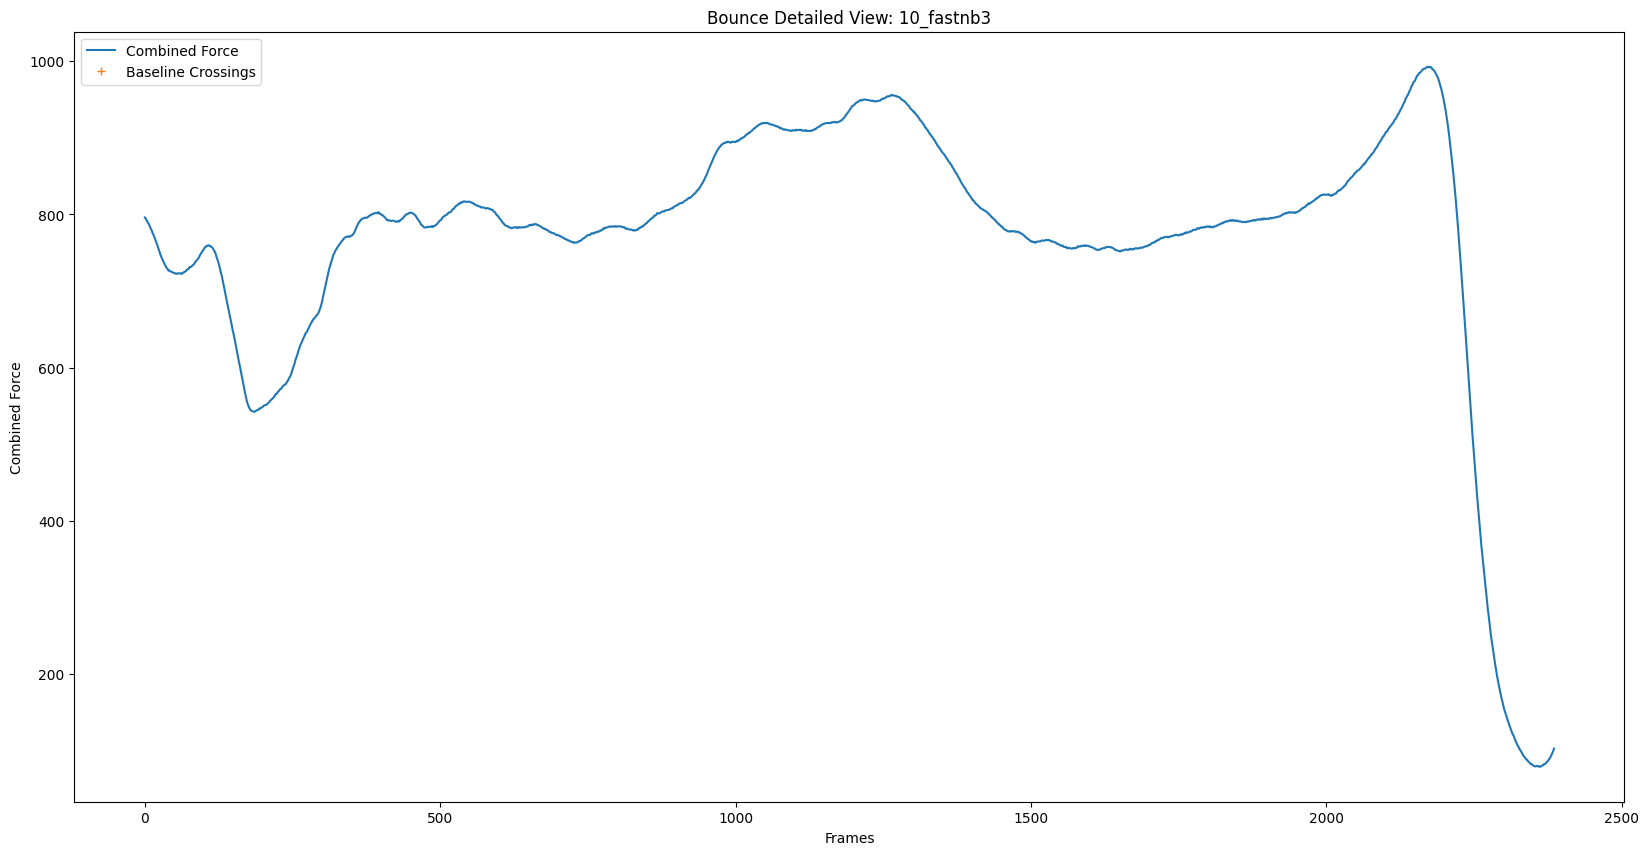

{'fps': 1000, 'source': 'fp', 'device': 'fp3d', 'gender': 'f', 'load': 72.5, 'bodyweight': 83.3}
No turning point detected for file 38_fastnb1. Skipping...


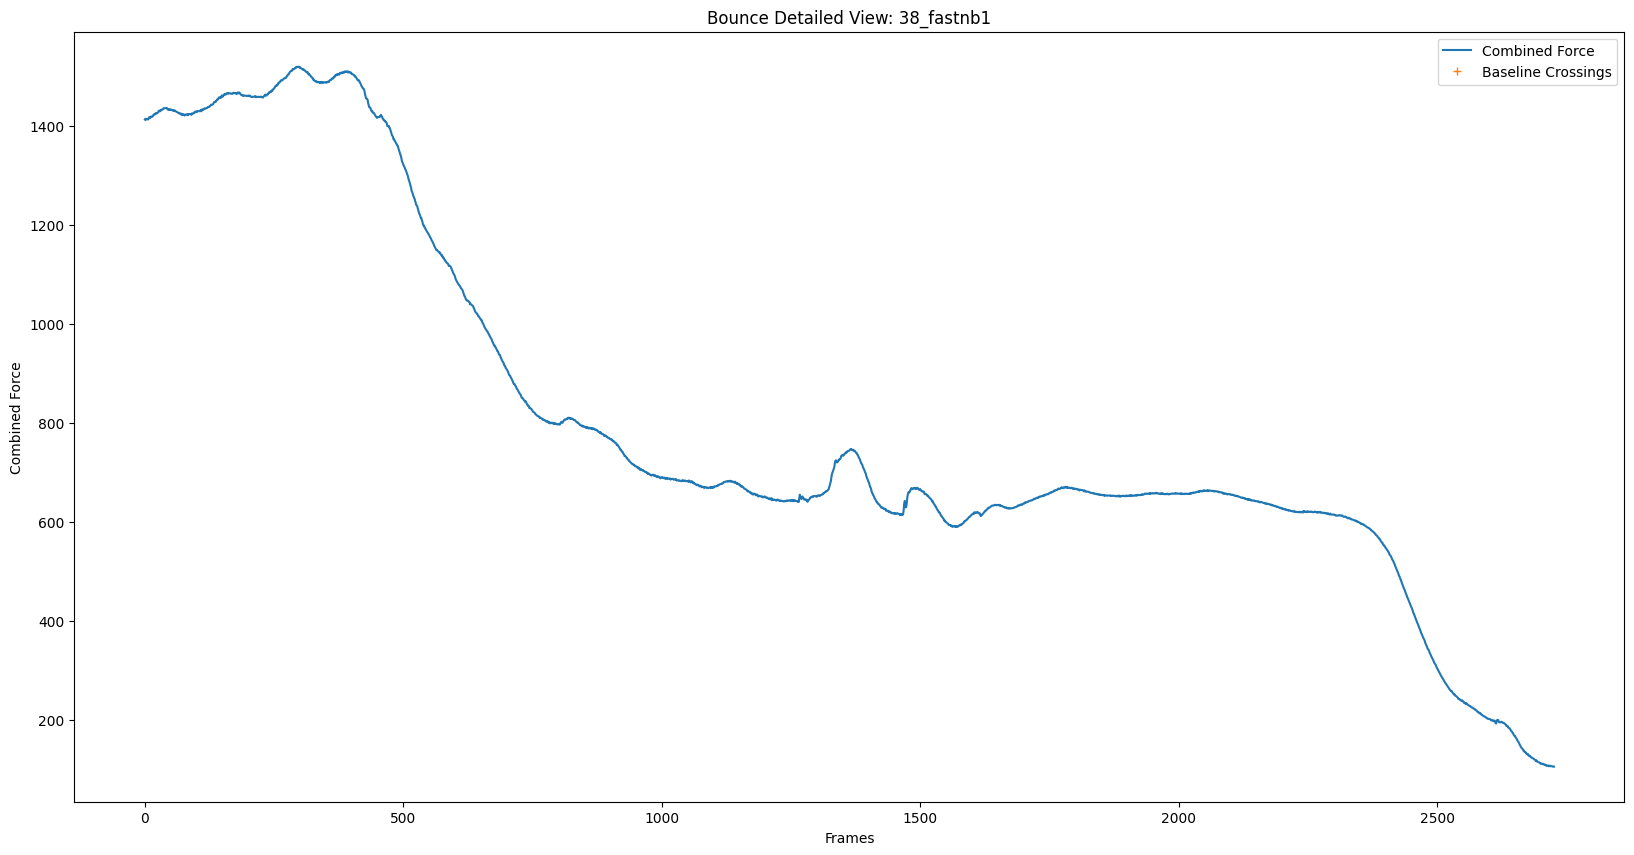

{'fps': 1000, 'source': 'fp', 'device': 'fp3d', 'gender': 'f', 'load': 85.0, 'bodyweight': 71.7}
Dip detected: True


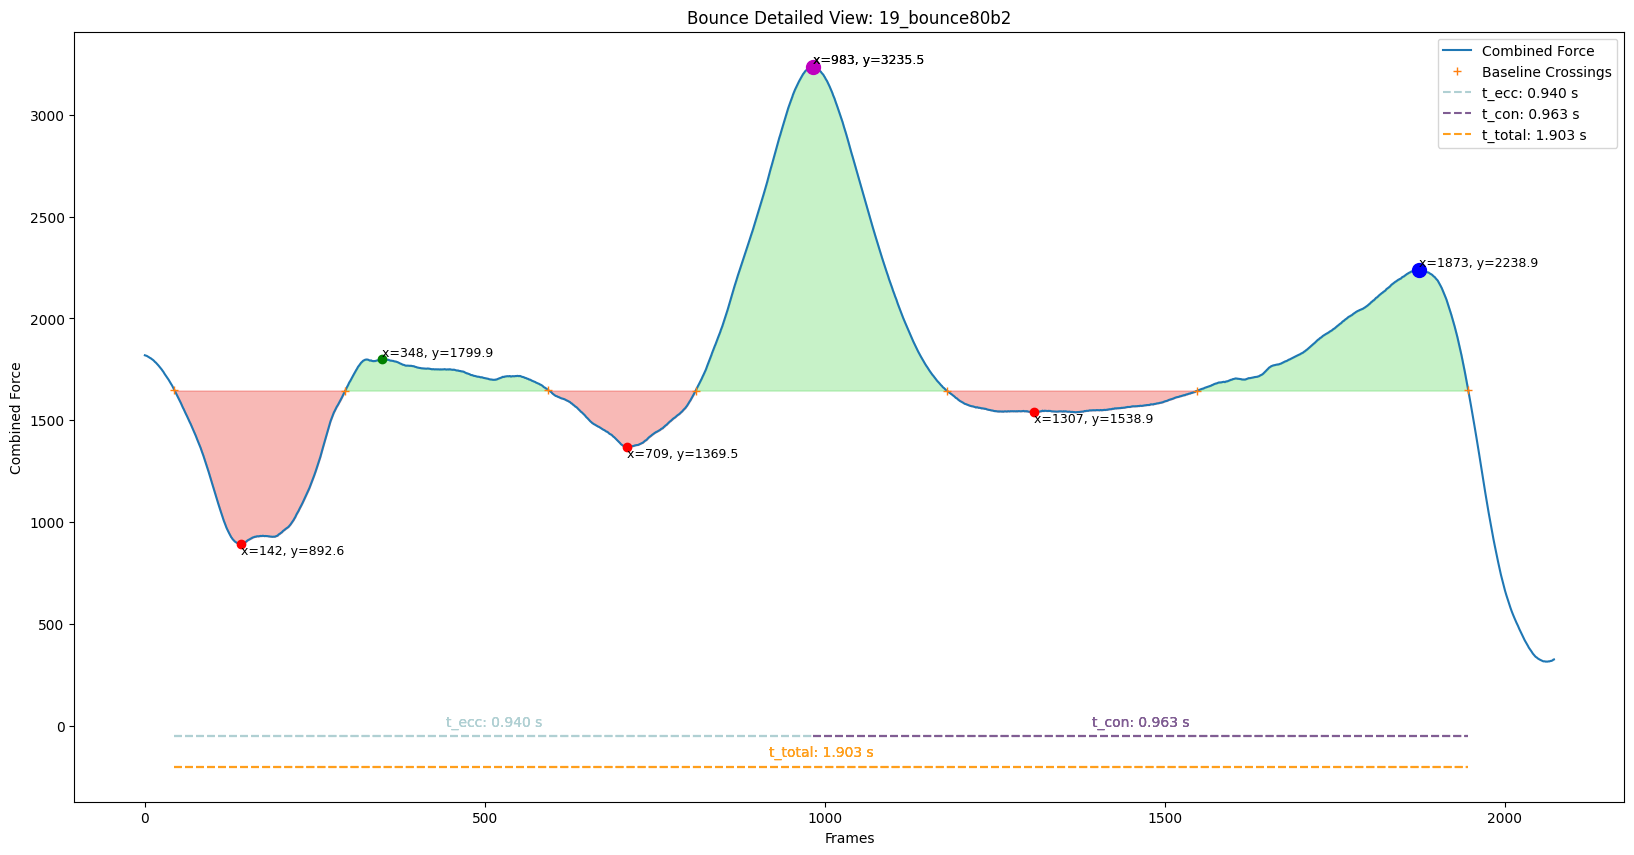

{'fps': 1000, 'source': 'fp', 'device': 'fp3d', 'gender': 'f', 'load': 95.0, 'bodyweight': 72.8}


In [8]:
insight.plot_data(file_name='10_fastnb3')
insight.plot_data(file_name='38_fastnb1')
insight.plot_data(file_name='19_bounce80b2')

In [3]:
insight.run_statistics(analysis_type='summary')

Statistics for bounce70b:
t_ecc; Avg: 1.244, Std Dev: 0.335, Median: 1.130, Min: 0.711, Max: 2.267
t_con; Avg: 0.975, Std Dev: 0.190, Median: 0.959, Min: 0.657, Max: 1.682
t_total; Avg: 2.219, Std Dev: 0.477, Median: 2.088, Min: 1.432, Max: 3.601
turning_force; Avg: 2821.003, Std Dev: 663.356, Median: 2730.373, Min: 1678.597, Max: 4820.644


File name not recognised: false
File name not recognised: false
Correlation between con_force and turning_force: correlation = 0.734, p-value = 0.000


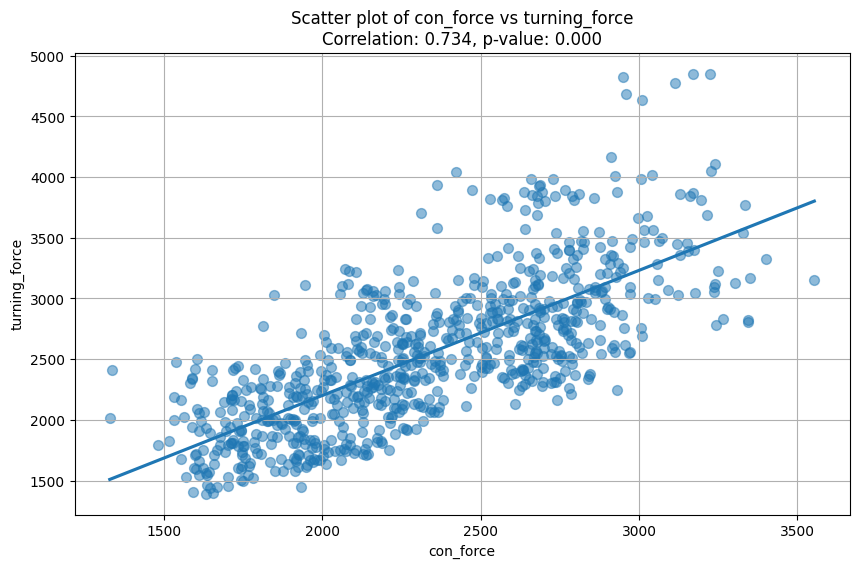

File name not recognised: false
File name not recognised: false
Correlation between con_force and t_con: correlation = 0.104, p-value = 0.003


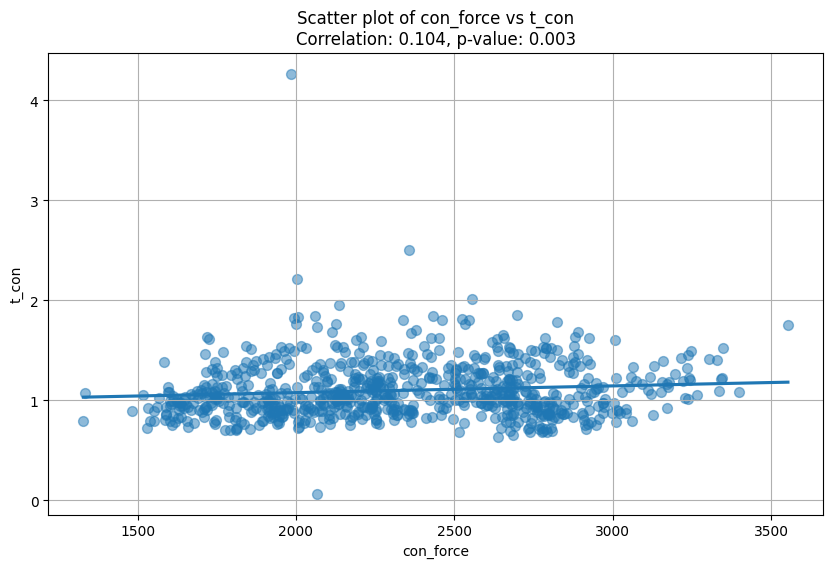

File name not recognised: false
File name not recognised: false
Correlation between turning_force and t_ecc: correlation = -0.094, p-value = 0.008


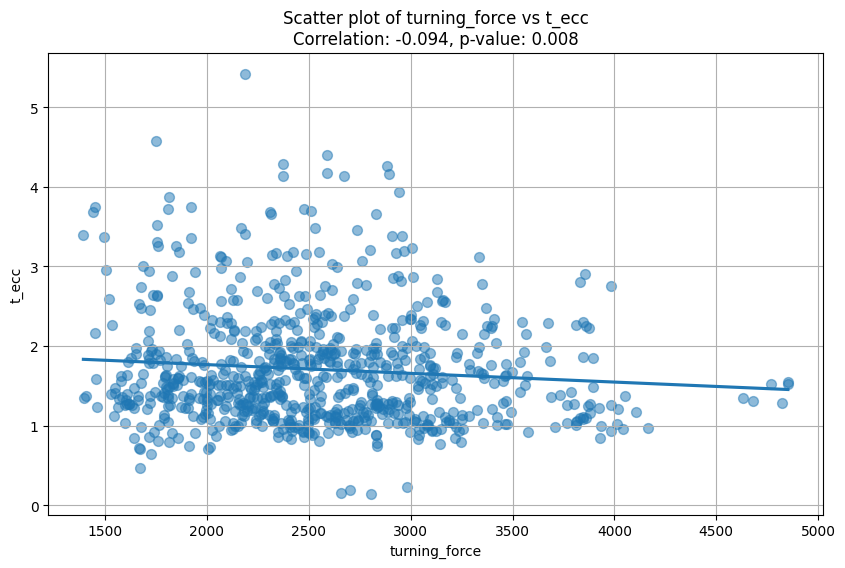

In [9]:
insight.run_statistics(analysis_type='cor', metric1='con_force', metric2='turning_force')
insight.run_statistics(analysis_type='cor', metric1='con_force', metric2='t_con')
insight.run_statistics(analysis_type='cor', metric1='turning_force', metric2='t_ecc')

----------------------------------------------------
Levene's test for homogeneity of variances: W=0.418, p-value=0.518
ANOVA results for t_con_force comparing bounce and nobounce:
                sum_sq     df         F   PR(>F)
C(group)  4.652379e+05    1.0  2.243801  0.13488
Residual  8.977982e+07  433.0       NaN      NaN


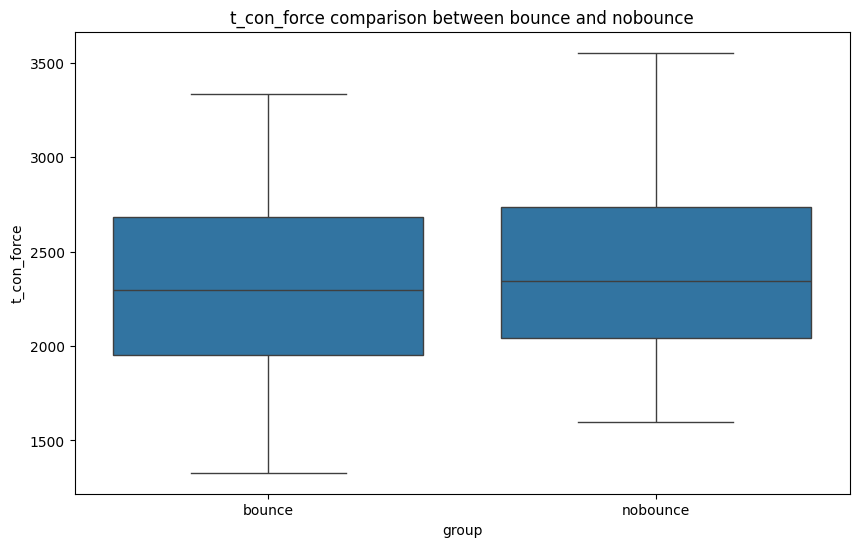

----------------------------------------------------
Levene's test for homogeneity of variances: W=0.002, p-value=0.966
ANOVA results for t_con_force comparing bounce and nobounce:
                sum_sq     df         F    PR(>F)
C(group)  2.754048e+05    1.0  1.635518  0.201794
Residual  5.859972e+07  348.0       NaN       NaN


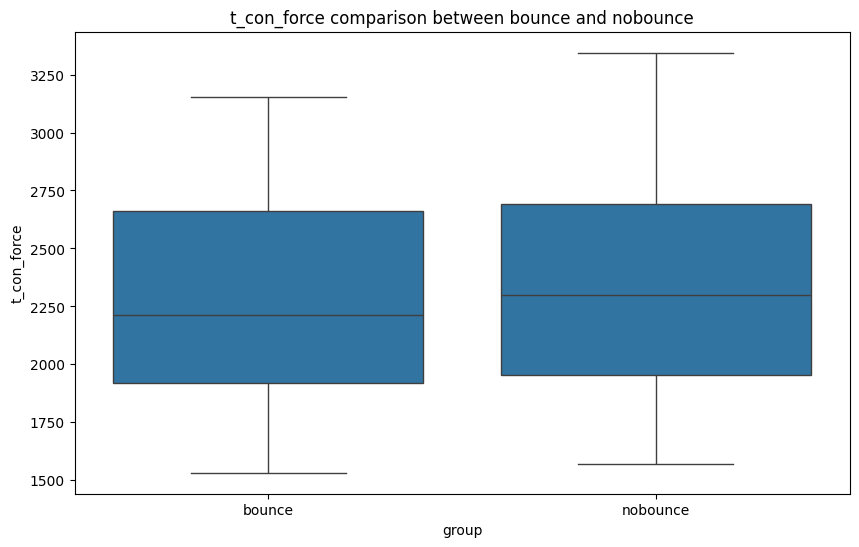

----------------------------------------------------
Levene's test for homogeneity of variances: W=0.270, p-value=0.603
ANOVA results for t_con_force comparing bounce and nobounce:
                sum_sq     df         F    PR(>F)
C(group)  7.402846e+05    1.0  3.880736  0.049195
Residual  1.493641e+08  783.0       NaN       NaN


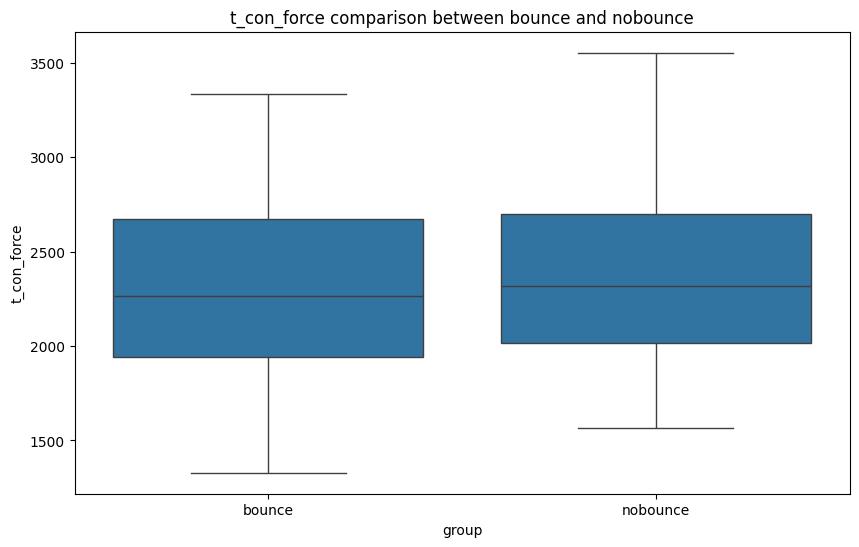

In [14]:
insight.run_statistics(analysis_type='anova', comparison_type='b_nb_weight', metric='t_con_force')
insight.run_statistics(analysis_type='anova', comparison_type='b_nb_speed', metric='t_con_force')
insight.run_statistics(analysis_type='anova', comparison_type='b_nb_all', metric='t_con_force')

Starting ANOVA calculation...
Metric: turning_force
Comparison Type: weightnb
ANOVA results for turning_force comparing bounce70nb and bounce80nb:
                sum_sq     df         F    PR(>F)
C(group)  6.585026e+05    1.0  2.266621  0.133662
Residual  6.217164e+07  214.0       NaN       NaN


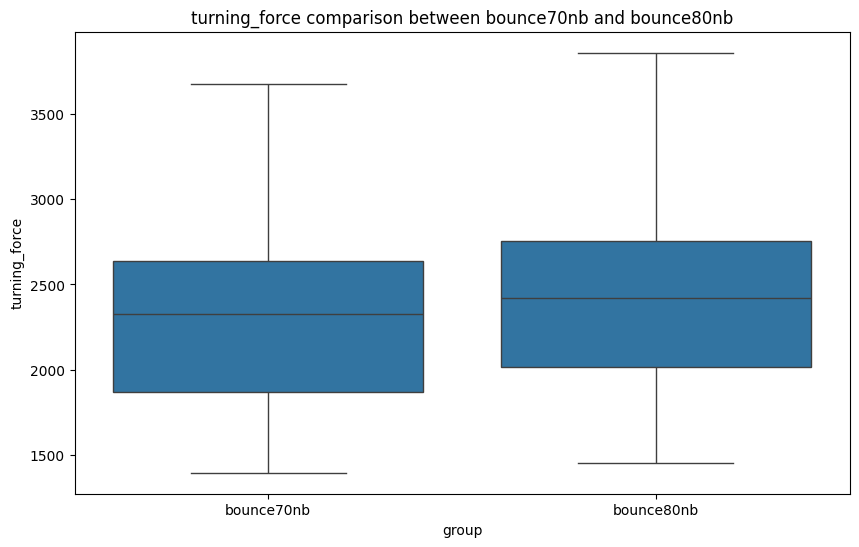

In [20]:
insight.run_statistics(analysis_type='anova', metric='turning_force', comparison_type='weightnb')

File name not recognised: false
File name not recognised: false
Contingency Table:
has_dip   False  True 
group                 
bounce      105    114
nobounce    191     25
Chi-Square Test:
Chi2: 80.10413429137292, p-value: 3.5518845654449827e-19, Degrees of Freedom: 1


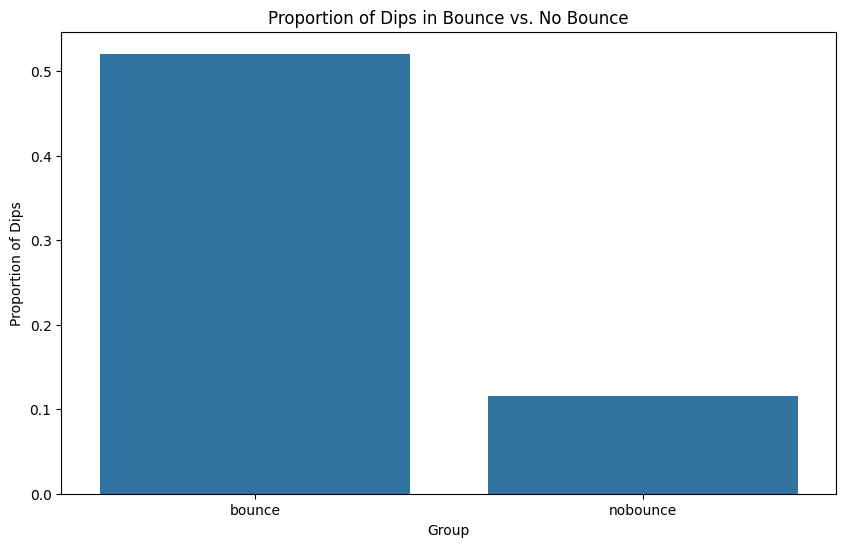

File name not recognised: false
File name not recognised: false
Contingency Table:
has_dip   False  True 
group                 
bounce       42    135
nobounce    150     25
Chi-Square Test:
Chi2: 133.87941673392524, p-value: 5.805661678337424e-31, Degrees of Freedom: 1


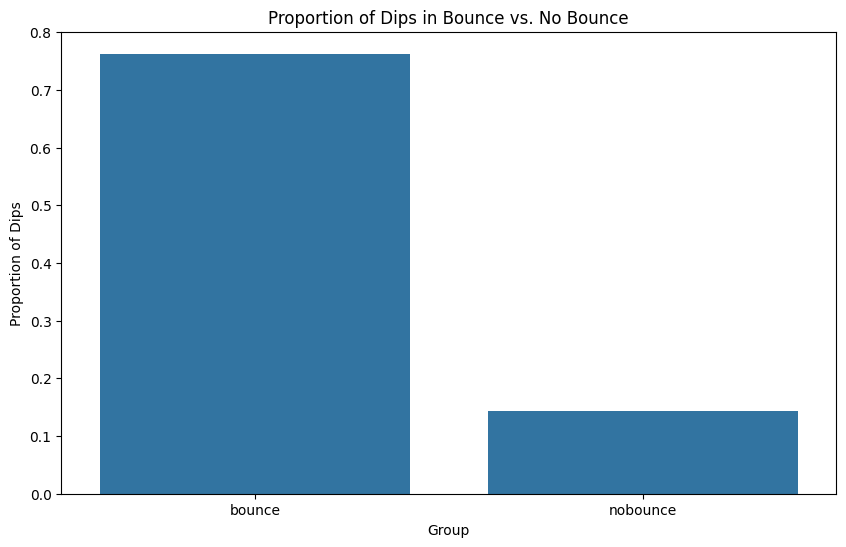

File name not recognised: false
File name not recognised: false
Contingency Table:
has_dip   False  True 
group                 
bounce      147    249
nobounce    341     50
Chi-Square Test:
Chi2: 207.42358106320398, p-value: 5.011682614856711e-47, Degrees of Freedom: 1


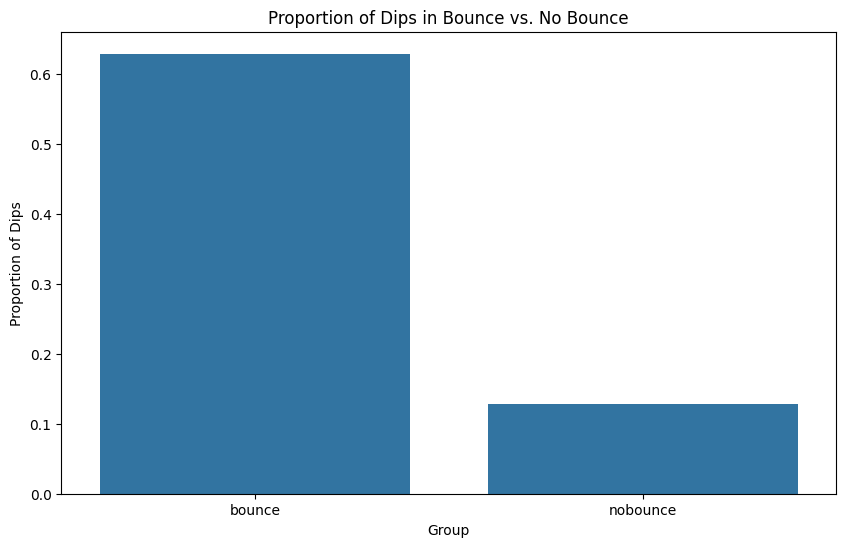

In [16]:
insight.run_statistics(analysis_type='chi2', comparison_type='b_nb_weight')
insight.run_statistics(analysis_type='chi2', comparison_type='b_nb_speed')
insight.run_statistics(analysis_type='chi2', comparison_type='b_nb_all')

Contingency Table:
has_dip     False  True 
group                   
bounce70b      53     58
bounce70nb     94     14
Chi-Square Test:
Chi2: 36.53066847672502, p-value: 1.502830269618108e-09, Degrees of Freedom: 1


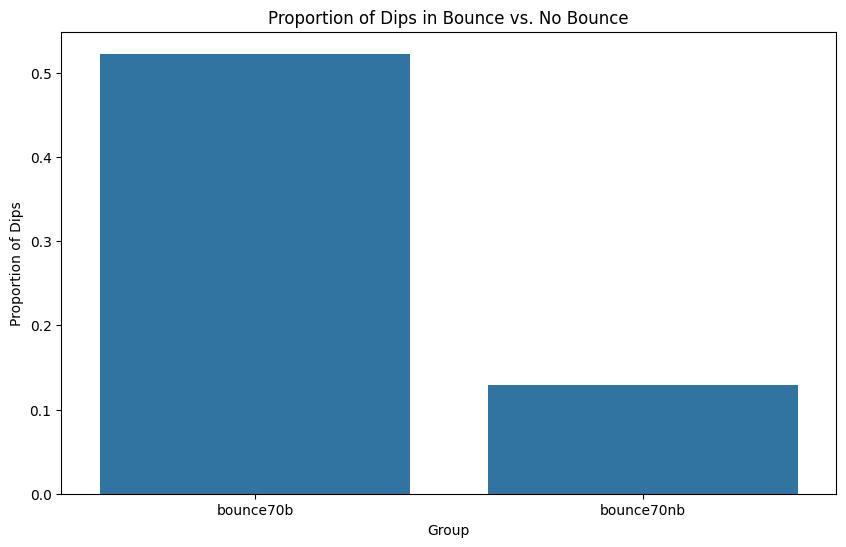

In [4]:
insight.run_statistics(analysis_type='chi2', comparison_type='b_nb_70')

Contingency Table:
has_dip     False  True 
group                   
bounce80b      52     56
bounce80nb     97     11
Chi-Square Test:
Chi2: 41.88881097866373, p-value: 9.661391549322764e-11, Degrees of Freedom: 1


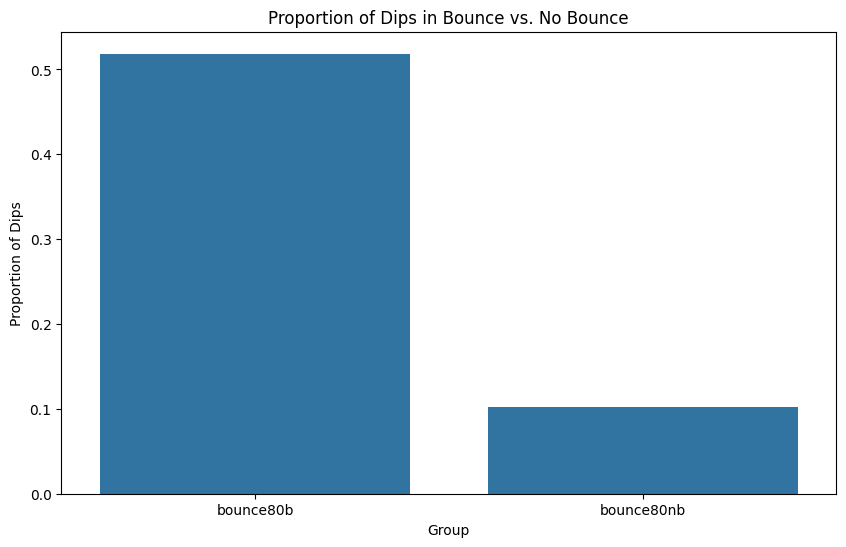

In [5]:
insight.run_statistics(analysis_type='chi2', comparison_type='b_nb_80')

Missing 'has_dip' for file_id: 10_fastnb3.csv
Missing 'has_dip' for file_id: 38_fastnb1.csv
Contingency Table:
has_dip  False  True 
group                
fastb       33     55
fastnb      76     10
Chi-Square Test:
Chi2: 45.95118408900679, p-value: 1.2123662625321589e-11, Degrees of Freedom: 1


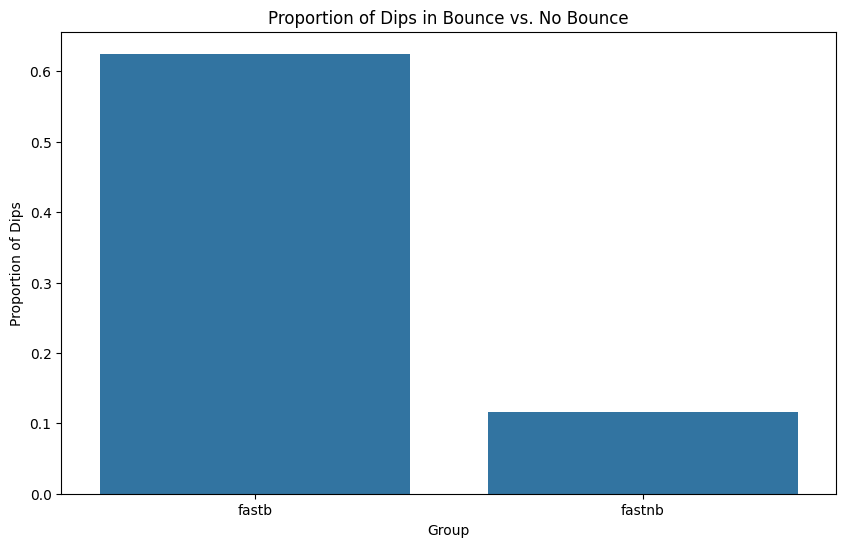

In [6]:
insight.run_statistics(analysis_type='chi2', comparison_type='b_nb_fast')

Contingency Table:
has_dip  False  True 
group                
slowb        9     80
slownb      72     15
Chi-Square Test:
Chi2: 90.56154673902363, p-value: 1.793115451963318e-21, Degrees of Freedom: 1


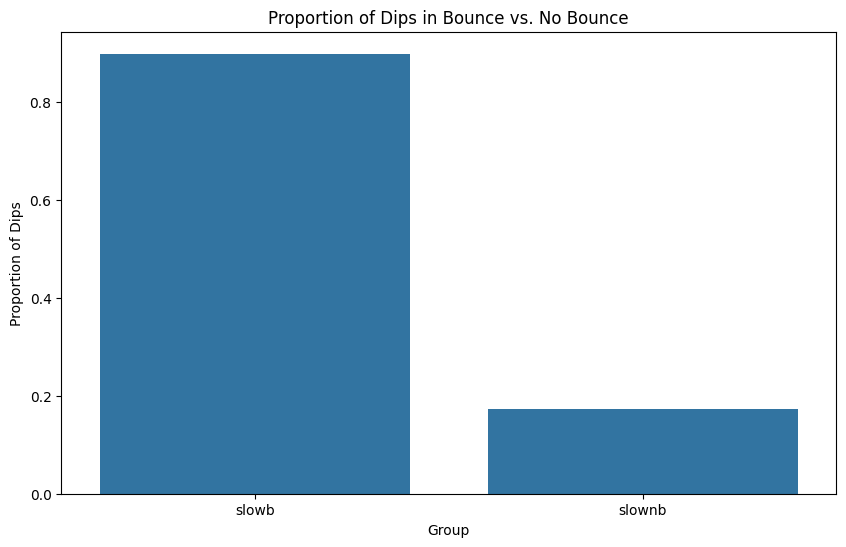

In [7]:
insight.run_statistics(analysis_type='chi2', comparison_type='b_nb_slow')